In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/train8(all_dummy).csv')
df.head()

,id,cancel,ni.age,len.at.res,premium,ni.marital.status,n.adults,n.children,tenure,claim.ind,...,sales.channel.lower_phone,coverage.type.lower_a,coverage.type.lower_b,coverage.type.lower_c,dwelling.type.lower_condo,dwelling.type.lower_house,dwelling.type.lower_tenant,credit.lower_high,credit.lower_low,credit.lower_medium
0,1,0,37.0,18.000000,950.507336,0.0,2.0,0.0,15.0,0.0,...,0,0,0,1,0,0,1,1,0,0
1,2,0,40.0,17.000000,909.346046,1.0,5.0,0.0,15.0,0.0,...,0,1,0,0,1,0,0,0,0,1
2,3,0,45.0,14.000000,897.084502,0.0,1.0,0.0,14.0,0.0,...,1,1,0,0,0,1,0,1,0,0
3,4,0,45.0,24.366136,979.039007,0.0,5.0,0.0,22.0,1.0,...,1,1,0,0,0,1,0,1,0,0
4,5,0,36.0,16.000000,932.379027,1.0,2.0,4.0,4.0,0.0,...,0,0,0,1,0,1,0,1,0,0


In [3]:
df = df.drop(axis=0, columns=['id'])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cancel', ylabel='count'>

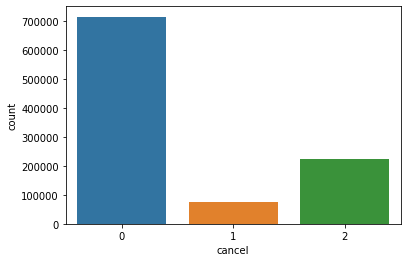

In [4]:
import seaborn as sns
sns.countplot(df['cancel'])

In [5]:
corr = df.corr()

<AxesSubplot:>

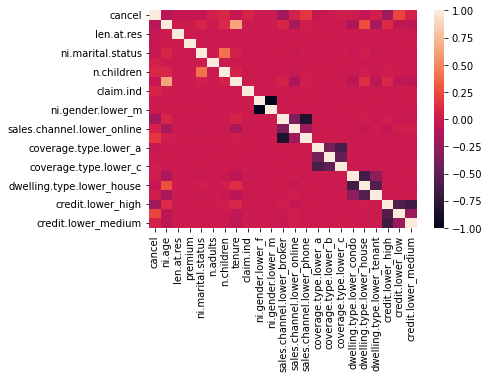

In [6]:
sns.heatmap(corr)

In [7]:
X = df.drop('cancel',axis=1)
y=df['cancel']

In [8]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [9]:
# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X, y = resample.fit_resample(X, y)

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split

train_x, val_x,train_y, val_y = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(train_x, train_y)

rfc_predict = rfc.predict(val_x)
print('Accuracy score:', accuracy_score(val_y, rfc_predict))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(val_y,rfc_predict))